In [1]:
import pandas as pd 

# Extraemos los datos de la api oficial modificada para poder extraer todos los datos existentes

In [2]:
df = pd.read_json("https://smartdrape.000webhostapp.com/smartdrape/index.php/Controlador_arduino/extraccion")

# Lo verificamos

In [3]:
df

,id_proceso,fecha,hora,temperatura,humedad,lluvia,distancia,id_dispositivo
0,145,2021-03-01,11:35:09,37.0,60.0,0,25.0,1
1,144,2021-03-01,11:30:09,35.0,67.0,0,30.0,1
2,143,2021-03-01,11:25:09,35.0,63.0,0,30.0,1
3,142,2021-03-01,11:20:00,36.0,67.0,0,30.0,1
4,141,2021-03-01,11:15:00,37.0,60.0,0,25.0,1
...,...,...,...,...,...,...,...,...
139,5,2020-11-10,02:30:20,35.0,50.0,1,100.0,1
140,4,2020-11-05,02:00:20,35.0,40.0,1,100.0,1
141,3,2020-10-26,01:30:00,29.0,20.0,0,40.0,1
142,2,2020-10-26,01:00:00,26.0,60.0,0,70.0,1


# Visualizamos el contenido de las columnas 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_proceso      144 non-null    int64  
 1   fecha           144 non-null    object 
 2   hora            144 non-null    object 
 3   temperatura     144 non-null    float64
 4   humedad         144 non-null    float64
 5   lluvia          144 non-null    int64  
 6   distancia       144 non-null    float64
 7   id_dispositivo  144 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 9.1+ KB


# Ahora visualizaremos los datos mas irrelevantes del dataframe

In [5]:
df.describe()

,id_proceso,temperatura,humedad,lluvia,distancia,id_dispositivo
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.0
mean,73.465278,34.420347,59.014653,0.222222,25.586250,1.0
std,41.771927,6.896810,12.758395,0.417191,18.209767,0.0
min,1.000000,10.320000,15.750000,0.000000,3.560000,1.0
25%,37.750000,30.000000,60.000000,0.000000,20.000000,1.0
50%,73.500000,35.000000,63.000000,0.000000,20.350000,1.0
75%,109.250000,37.000000,67.000000,0.000000,30.000000,1.0
max,145.000000,80.320000,70.750000,1.000000,150.000000,1.0


# Ahora bien relacionaremos los datos del clima los cuales seran analizados.

In [6]:
relation = df[['temperatura','humedad','lluvia']]

In [7]:
relation

,temperatura,humedad,lluvia
0,37.0,60.0,0
1,35.0,67.0,0
2,35.0,63.0,0
3,36.0,67.0,0
4,37.0,60.0,0
...,...,...,...
139,35.0,50.0,1
140,35.0,40.0,1
141,29.0,20.0,0
142,26.0,60.0,0


In [8]:
df.columns

Index(['id_proceso', 'fecha', 'hora', 'temperatura', 'humedad', 'lluvia',
       'distancia', 'id_dispositivo'],
      dtype='object')

# Importamos las librerias para las graficas 

In [9]:
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline 

# Ahora veremos la relacion de estos datos en cuanto a la relacion que estos tienen 

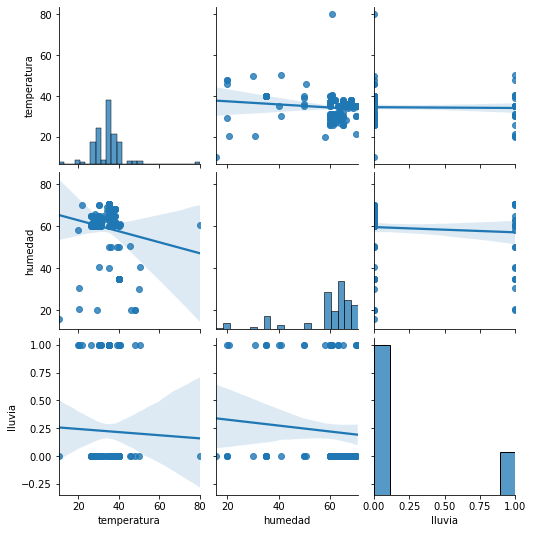

In [11]:
sns.pairplot(relation, kind='reg')
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperatura', ylabel='Density'>

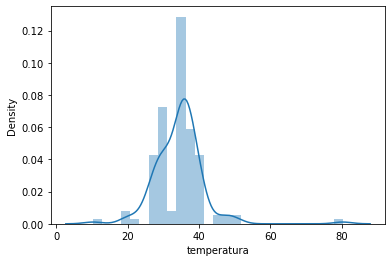

In [14]:
sns.distplot(df.temperatura)

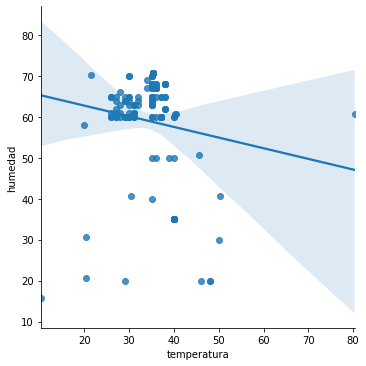

In [15]:
sns.lmplot(x='temperatura', y='humedad', data=df)
plt.savefig('img_web_site/hum-temp.png', transparent=True)

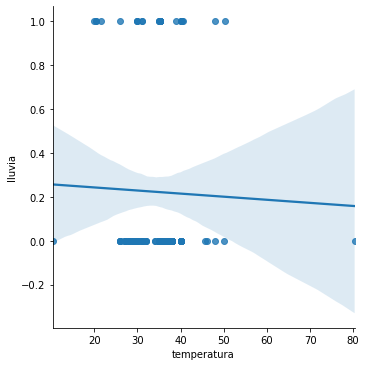

In [16]:
sns.lmplot(x='temperatura', y='lluvia', data=df)
plt.savefig('img_web_site/temp-lluvia.png', transparent=True)

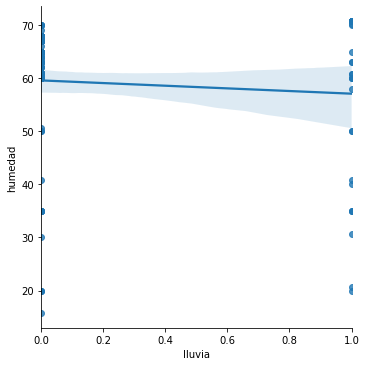

In [17]:
sns.lmplot(x='lluvia', y='humedad', data=df)
plt.savefig('img_web_site/hum-lluvia.png', transparent=True)

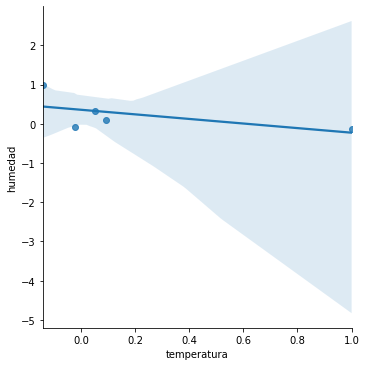

In [18]:
datanew = df.corr()
sns.lmplot(x='temperatura', y='humedad', data=datanew)
plt.savefig('img_web_site/corr-hum-temp.png', transparent=True)

# Podemos ver la correlacion 

In [19]:
df.corr()

,id_proceso,temperatura,humedad,lluvia,distancia,id_dispositivo
id_proceso,1.000000,0.052261,0.331990,-0.527635,-0.081667,NaN
temperatura,0.052261,1.000000,-0.140808,-0.023237,0.091169,NaN
humedad,0.331990,-0.140808,1.000000,-0.081731,0.101795,NaN
lluvia,-0.527635,-0.023237,-0.081731,1.000000,0.185813,NaN
distancia,-0.081667,0.091169,0.101795,0.185813,1.000000,NaN
id_dispositivo,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df

,id_proceso,fecha,hora,temperatura,humedad,lluvia,distancia,id_dispositivo
0,145,2021-03-01,11:35:09,37.0,60.0,0,25.0,1
1,144,2021-03-01,11:30:09,35.0,67.0,0,30.0,1
2,143,2021-03-01,11:25:09,35.0,63.0,0,30.0,1
3,142,2021-03-01,11:20:00,36.0,67.0,0,30.0,1
4,141,2021-03-01,11:15:00,37.0,60.0,0,25.0,1
...,...,...,...,...,...,...,...,...
139,5,2020-11-10,02:30:20,35.0,50.0,1,100.0,1
140,4,2020-11-05,02:00:20,35.0,40.0,1,100.0,1
141,3,2020-10-26,01:30:00,29.0,20.0,0,40.0,1
142,2,2020-10-26,01:00:00,26.0,60.0,0,70.0,1


# Ahora debido a que tenemos datos con punto decimal los convertiremos en flotantes

In [21]:
df = df.astype({"temperatura":'float',
                "humedad":'float',
                "lluvia":'float',
                "distancia":'float',
               })

In [22]:
df

,id_proceso,fecha,hora,temperatura,humedad,lluvia,distancia,id_dispositivo
0,145,2021-03-01,11:35:09,37.0,60.0,0.0,25.0,1
1,144,2021-03-01,11:30:09,35.0,67.0,0.0,30.0,1
2,143,2021-03-01,11:25:09,35.0,63.0,0.0,30.0,1
3,142,2021-03-01,11:20:00,36.0,67.0,0.0,30.0,1
4,141,2021-03-01,11:15:00,37.0,60.0,0.0,25.0,1
...,...,...,...,...,...,...,...,...
139,5,2020-11-10,02:30:20,35.0,50.0,1.0,100.0,1
140,4,2020-11-05,02:00:20,35.0,40.0,1.0,100.0,1
141,3,2020-10-26,01:30:00,29.0,20.0,0.0,40.0,1
142,2,2020-10-26,01:00:00,26.0,60.0,0.0,70.0,1


In [24]:
ls 

2_Intro_Python.ipynb                   lost+found/
57654-0.txt                            Pandas.ipynb
archive.zip                            Pokemon.csv
Bases de Datos.ipynb                   practicas de transformacion.ipynb
city_temperature.csv                   Primer notebook.ipynb
clase 1.ipynb                          Proyecto Integrador.ipynb
data.csv                               segundo notebook.ipynb
data.csv.zip                           simple.json
Data frame.ipynb                       Tarea de clase.ipynb
Data from html-2.ipynb                 Tarea de hoy.ipynb
Data from html.ipynb                   Untitled1.ipynb
examen parcial 2.ipynb                 Untitled2.ipynb
grafica.png                            Untitled3.ipynb
img_web_site/                          Untitled4.ipynb
importación de la base de datos.ipynb  Untitled5.ipynb
Injeccion de datos .ipynb              Untitled.ipynb


In [25]:
df

,id_proceso,fecha,hora,temperatura,humedad,lluvia,distancia,id_dispositivo
0,145,2021-03-01,11:35:09,37.0,60.0,0.0,25.0,1
1,144,2021-03-01,11:30:09,35.0,67.0,0.0,30.0,1
2,143,2021-03-01,11:25:09,35.0,63.0,0.0,30.0,1
3,142,2021-03-01,11:20:00,36.0,67.0,0.0,30.0,1
4,141,2021-03-01,11:15:00,37.0,60.0,0.0,25.0,1
...,...,...,...,...,...,...,...,...
139,5,2020-11-10,02:30:20,35.0,50.0,1.0,100.0,1
140,4,2020-11-05,02:00:20,35.0,40.0,1.0,100.0,1
141,3,2020-10-26,01:30:00,29.0,20.0,0.0,40.0,1
142,2,2020-10-26,01:00:00,26.0,60.0,0.0,70.0,1


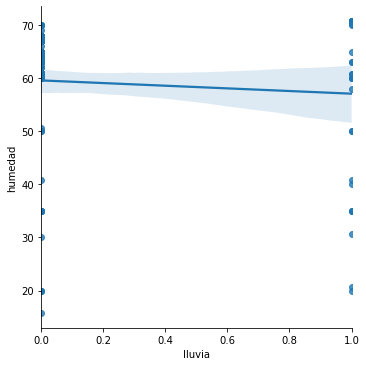

In [26]:
sns.lmplot(x='lluvia', y='humedad', data=df)

# Agregamos las librerias para acceder a los csv de S3 y lo exportamos a nuestro bucket.

In [19]:
from io import StringIO  
import boto3

 

bucket = 'testutmjesusleal' 
csv_buffer = StringIO()
df.to_csv(csv_buffer)

 

s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, 'datos1_smartdrape.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'G7ERJEV8FTF1NJKV',
  'HostId': 'AVWnTvyFet5tBSrqLvAlf2EcnM09EkYZG/OzR5hzdFYTTgzNMykkX/YcdEFAsElkm1T5iA1rMMw=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'AVWnTvyFet5tBSrqLvAlf2EcnM09EkYZG/OzR5hzdFYTTgzNMykkX/YcdEFAsElkm1T5iA1rMMw=',
   'x-amz-request-id': 'G7ERJEV8FTF1NJKV',
   'date': 'Sun, 14 Mar 2021 02:19:04 GMT',
   'etag': '"aa231242017f3c52b36556a31f92f7b9"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"aa231242017f3c52b36556a31f92f7b9"'}

# Importamos las librerias necesarias

In [27]:
import logging
import boto3
from botocore.exceptions import ClientError

In [28]:
import boto3
s3 = boto3.resource('s3')

# Visualizamos los buckets existentes

In [29]:
for bucket in s3.buckets.all():
    print(bucket.name)

miprimerapaginaleal
testutmjesusleal


In [52]:
cd ..

/home/ec2-user/SageMaker


# Enviamos la imagen a S3

In [47]:
data = open('img_web_site/temp-lluvia.png', 'rb')
s3.Bucket('miprimerapaginaleal').put_object(Key='img/temp-lluvia.png', Body=data)

s3.Object(bucket_name='miprimerapaginaleal', key='img/temp-lluvia.png')

In [48]:
data1 = open('img_web_site/hum-temp.png','rb')
s3.Bucket('miprimerapaginaleal').put_object(Key='img/hum-temp.png', Body=data1)

s3.Object(bucket_name='miprimerapaginaleal', key='img/hum-temp.png')

In [53]:
data3 = open('img_web_site/hum-temp.png','rb')
s3.Bucket('miprimerapaginaleal').put_object(Key='img/hum-lluvia.png', Body=data3)

s3.Object(bucket_name='miprimerapaginaleal', key='img/hum-lluvia.png')

In [54]:
data4 = open('img_web_site/hum-temp.png','rb')
s3.Bucket('miprimerapaginaleal').put_object(Key='img/corr-hum-temp.png', Body=data4)

s3.Object(bucket_name='miprimerapaginaleal', key='img/corr-hum-temp.png')